<a href="https://colab.research.google.com/github/JeanMusenga/TOSEM-2025-Submission/blob/main/Classifiers_with_GloVe_14932PostsMixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://chatgpt.com/share/7bf0971e-4d5c-47f4-abc5-4c29d6735f27

# Load GloVe Embeddings from Google Drive
In future sessions, you can load the embeddings directly from Google Drive without having to download and unzip them again:
https://chatgpt.com/share/31751243-a735-41ad-b1a6-0e7952f9b67e

import os

glove_dir = "/content/drive/My Drive/Thesis_Musenga/"

embeddings_index = {}
#Replace "glove.6B.100d.txt" with the specific GloVe file you need.
with open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

print("Loaded %s word vectors." % len(embeddings_index))

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import os
from tqdm import tqdm


# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Download necessary NLTK data

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load the dataset
df = pd.read_excel('14932_ARPs_and_Programming_Posts.xlsx')

In [ ]:
df.shape

(14932, 2)

In [ ]:
class_distribution = df['Label'].value_counts()
print(class_distribution)

Label
0    7466
1    7466
Name: count, dtype: int64


# Text preprocessing: Tokenization, Lemmatization, etc

### Cleaning data

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# Function to remove HTML tags and replace links, images, code snippets, and tables with placeholders
def clean_html(text):
    if not isinstance(text, str):
        return text

    soup = BeautifulSoup(text, "html.parser")

    # Replace all links with '[external-link]'
    for a in soup.find_all('a'):
        a.replace_with('[external-link]')

    # Replace all images with '[figure]'
    for img in soup.find_all('img'):
        img.replace_with('[figure]')

    # Replace all code blocks with '[code-snippet]'
    for code in soup.find_all('code'):  # Fixed this line
        code.replace_with('[code-snippet]')

    # Replace all tables with '[table]'
    for table in soup.find_all('table'):
        table.replace_with('[table]')

    # Get the text without any remaining HTML tags
    clean_text = soup.get_text()

    return clean_text

# Load your DataFrame (assuming df is already defined)
# df = pd.read_csv('your_file.csv')  # Uncomment if loading from a file

# Apply the function to 'Question_body' column
df['Question_body_cleaned'] = df['Question_body'].apply(clean_html)


# Print sample cleaned data
print(df[['Question_body', 'Question_body_cleaned']].head())


                                       Question_body  \
0  <p>When deploying a Windows EC2 instance with ...   
1  I'm pretty new to my company (2 weeks) and we'...   
2  <p>I am trying to figure out how to get <code>...   
3  Say you have an application divided into 3-tie...   
4  <p>I am trying to use the circuit breaker patt...   

                               Question_body_cleaned  
0  When deploying a Windows EC2 instance with Ter...  
1  I'm pretty new to my company (2 weeks) and we'...  
2  I am trying to figure out how to get [code-sni...  
3  Say you have an application divided into 3-tie...  
4  I am trying to use the circuit breaker pattern...  


In [ ]:
# Text preprocessing: Tokenization, Lemmatization, etc
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# Ensure the column contains strings and handle NaN values
#df['Question_body_cleaned'] = df['Question_body_cleaned'].astype(str).fillna("")
#df['Question_body_cleaned'] = df['Question_body_cleaned'].apply(preprocess_text)
df['Question_body_cleaned'] = df['Question_body_cleaned'].fillna('').astype(str)

# Apply the preprocessing function
df['Question_body_preprocessed'] = df['Question_body_cleaned'].apply(preprocess_text)

# Save the updated DataFrame to an Excel file

In [ ]:
df.to_excel('preprocessed_14932_ARPs_and_Programming_Posts.xlsx', index=False)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-03-06 17:46:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-03-06 17:46:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-03-06 17:46:49--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Function to load GloVe embeddings efficiently
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in tqdm(f, desc="Loading GloVe embeddings"):
            values = line.split()
            word = values[0]
            embeddings = np.array(values[1:], dtype='float32')
            embeddings_index[word] = embeddings
    return embeddings_index

# Load GloVe embeddings (check file path)
glove_path = '/content/glove.6B.200d.txt'  # Modify if needed
glove_embeddings_index = load_glove_embeddings(glove_path)

# Function to convert question text into an embedding
def question_to_embedding(question, embeddings_index, embedding_dim=200):
    words = question.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]

    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)  # Zero vector if no words found

# Generate GloVe embeddings for each question
glove_vectors = np.array([question_to_embedding(q, glove_embeddings_index) for q in df['Question_body_preprocessed']])

# Convert the list of embeddings into a DataFrame
glove_embeddings_df = pd.DataFrame(glove_vectors)

# Prepare features and labels
X = np.array(glove_vectors)  # Ensure correct format
y = df['Label'].astype(int).values


Loading GloVe embeddings: 400000it [00:22, 18121.26it/s]


# Train-test split

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes with Glove

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy using accuracy_score
overall_accuracy = accuracy_score(y_test, y_pred)

# Print the overall accuracy and class-wise metrics
print(f'Overall Accuracy: {overall_accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')


Overall Accuracy: 0.8148644124539672
Class 0 - Precision: 0.8250688705234159, Recall: 0.8002672010688042, F1-score: 0.8124788063750424, Support: 1497
Class 1 - Precision: 0.8052117263843648, Recall: 0.8295302013422818, F1-score: 0.8171900826446281, Support: 1490


## Overall

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Compute precision, recall, and F1-score for each class (also including the average)
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute overall metrics (macro average or weighted average)
precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Calculate overall accuracy using accuracy_score
overall_accuracy = accuracy_score(y_test, y_pred)

# Print the overall accuracy and average metrics
print(f'Overall Precision (Macro-average): {precision_macro}')
print(f'Overall Recall (Macro-average): {recall_macro}')
print(f'Overall F1-score (Macro-average): {f1_macro}')
print(f'Overall Accuracy: {overall_accuracy}')


Overall Precision (Macro-average): 0.8151402984538904
Overall Recall (Macro-average): 0.8148987012055431
Overall F1-score (Macro-average): 0.8148344445098352
Overall Accuracy: 0.8148644124539672


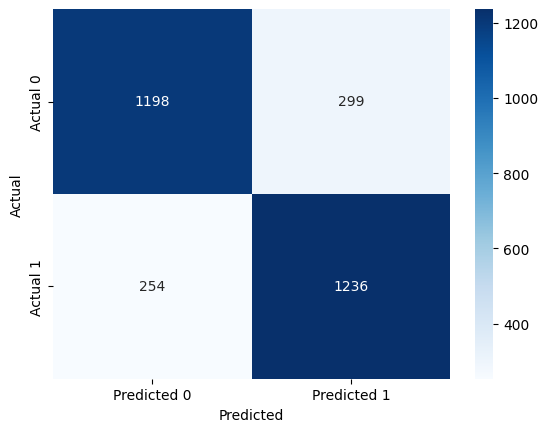

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# kNN with Glove

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

knn_model.predict(X_test)

# Predict on the test set
y_pred = knn_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.628680479825518
Class 0 - Precision: 0.8344262295081967, Recall: 0.6800267201068805, F1-score: 0.749355907250644, Support: 1497
Class 1 - Precision: 0.7289190718732315, Recall: 0.8644295302013423, F1-score: 0.7909118821000921, Support: 1490


## Overall

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Predict on the test set (only once)
y_pred = knn_model.predict(X_test)

# Compute per-class precision, recall, F1-score
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute overall precision, recall, and F1-score (macro-average)
precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Overall Precision (Macro-average): {precision_macro}')
print(f'Overall Recall (Macro-average): {recall_macro}')
print(f'Overall F1-score (Macro-average): {f1_macro}')
print(f'Overall Accuracy: {overall_accuracy}')

Overall Precision (Macro-average): 0.7816726506907141
Overall Recall (Macro-average): 0.7722281251541114
Overall F1-score (Macro-average): 0.7701338946753681
Overall Accuracy: 0.7720120522263141


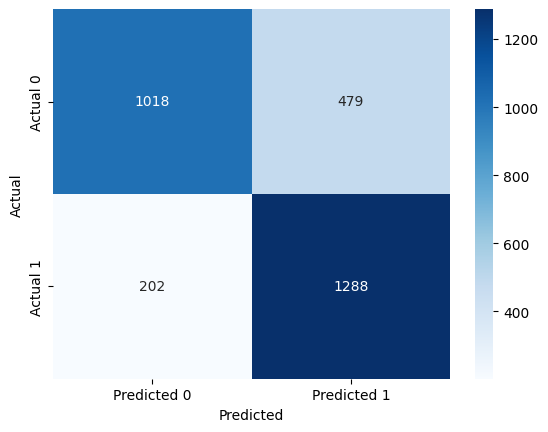

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decison Tree with Glove

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
# Predict on the test set
y_pred = dt_model.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.5737618545837724
Class 0 - Precision: 0.7299465240641712, Recall: 0.7294589178356713, F1-score: 0.7297026394921483, Support: 1497
Class 1 - Precision: 0.7283702213279678, Recall: 0.7288590604026846, F1-score: 0.7286145588728614, Support: 1490


## Overall

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Compute overall precision, recall, and F1-score (macro-average gives equal weight to both classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print overall metrics
print(f'Overall Precision: {precision}')
print(f'Overall Recall: {recall}')
print(f'Overall F1-score: {f1}')
print(f'Overall Accuracy: {overall_accuracy}')

Overall Precision: 0.7291582418823934
Overall Recall: 0.7291574199853846
Overall F1-score: 0.7291577492082866
Overall Accuracy: 0.7291596919986608


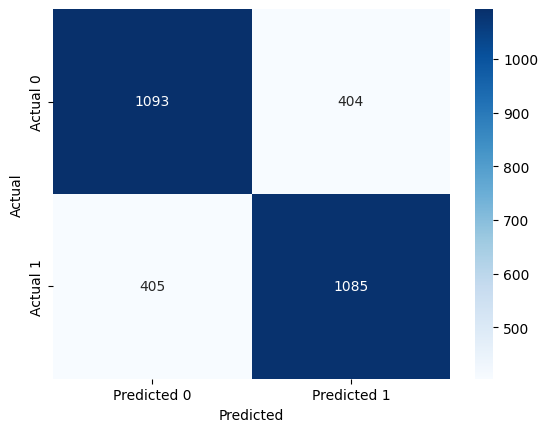

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression with Glove

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model = lg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lg_model.predict(X_test)


# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.799939740885809
Class 0 - Precision: 0.885506287227002, Recall: 0.8937875751503006, F1-score: 0.8896276595744681, Support: 1497
Class 1 - Precision: 0.8922764227642277, Recall: 0.8838926174496644, F1-score: 0.8880647336480108, Support: 1490


## Overall

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Train Logistic Regression model
lg_model = LogisticRegression(C=5, penalty='l1', solver='liblinear')
lg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lg_model.predict(X_test)

# Compute per-class precision, recall, F1-score
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute overall precision, recall, and F1-score (macro-average)
precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Overall Precision (Macro-average): {precision_macro}')
print(f'Overall Recall (Macro-average): {recall_macro}')
print(f'Overall F1-score (Macro-average): {f1_macro}')
print(f'Overall Accuracy: {overall_accuracy}')

Overall Precision (Macro-average): 0.8888913549956148
Overall Recall (Macro-average): 0.8888400962999825
Overall F1-score (Macro-average): 0.8888461966112394
Overall Accuracy: 0.8888516906595246


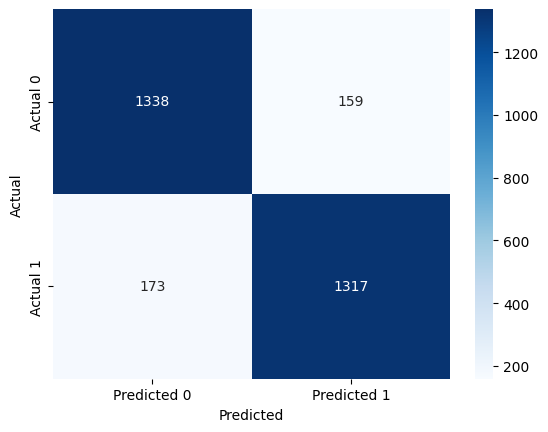

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM with GloVe

In [ ]:
# Train the SVM model
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Predict and evaluate
y_pred = svm_model.predict(X_test)


# Compute precision, recall, and F1-score for each class
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract TP, TN, FP, FN for each class
TP_0 = conf_matrix[0, 0]
FN_0 = conf_matrix[0, 1]
FP_0 = conf_matrix[1, 0]
TN_0 = conf_matrix[1, 1]

TP_1 = conf_matrix[1, 1]
FN_1 = conf_matrix[1, 0]
FP_1 = conf_matrix[0, 1]
TN_1 = conf_matrix[0, 0]

# Calculate overall accuracy
accuracy = (TP_0 + TP_1) / (TP_0 + TP_1 + FP_0 + FP_1 + FN_0 + FN_1)

print(f'Overall Accuracy: {accuracy}')
print(f'Class 0 - Precision: {precision_class[0]}, Recall: {recall_class[0]}, F1-score: {f1_class[0]}, Support: {support_class[0]}')
print(f'Class 1 - Precision: {precision_class[1]}, Recall: {recall_class[1]}, F1-score: {f1_class[1]}, Support: {support_class[1]}')

Overall Accuracy: 0.8070175438596491
Class 0 - Precision: 0.8869908015768725, Recall: 0.9018036072144289, F1-score: 0.8943358728055647, Support: 1497
Class 1 - Precision: 0.8996587030716724, Recall: 0.8845637583892617, F1-score: 0.8920473773265651, Support: 1490


## Overall

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Compute per-class precision, recall, F1-score
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1])

# Compute overall precision, recall, and F1-score (macro-average)
precision_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
recall_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
f1_macro = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Compute overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Overall Precision (Macro-average): {precision_macro}')
print(f'Overall Recall (Macro-average): {recall_macro}')
print(f'Overall F1-score (Macro-average): {f1_macro}')
print(f'Overall Accuracy: {overall_accuracy}')

Overall Precision (Macro-average): 0.8933247523242724
Overall Recall (Macro-average): 0.8931836828018453
Overall F1-score (Macro-average): 0.893191625066065
Overall Accuracy: 0.8932038834951457


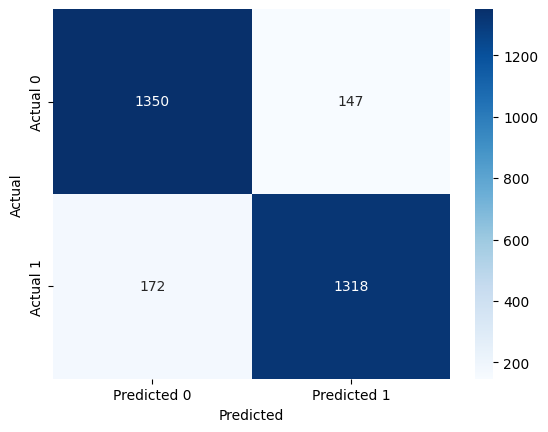

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()